<a href="https://colab.research.google.com/github/sydney-machine-learning/differentiable-pedestrian-simulators/blob/main/Implementing_2_Pedestrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task was to implement the simplest form of finding the trajectory of two pedestrian such that they don't collide.**


*   Suggested cost function was L2 norm between the current position and final goal position of the pedestrian
*  The penalty factor to avoid collision, viz inverse of L2 norm of diff between the position of the two pedestrian was included.



In [83]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
def f_val_double(x1,x2,v1,v2,g1,g2):
  x1.requires_grad=True
  x2.requires_grad=True
  cost_function=torch.linalg.norm(torch.sub(x1,g1))
  sig =torch.pow(torch.linalg.norm(torch.sub(x1,x2)),-2)
  sig = sig + 99*torch.pow(torch.linalg.norm(torch.sub(v1,v2)),-2)
  cost_function = cost_function + 90*torch.linalg.norm(x2-g2)
  cost_function = cost_function - 100*sig
  cost_function.backward()
  return -x1.grad , -x2.grad

In [85]:
g1=torch.Tensor([1,0])
g2=torch.Tensor([0,0])

In [86]:
x1=torch.Tensor([0,0])
x2=torch.Tensor([1,0])

In [87]:
x10 = x1
x20 = x2
dt = 0.0001
x1_list=[]
x2_list=[]
x1_list.append(x1.clone())
x2_list.append(x2.clone())
v1 = torch.tensor([100,10], dtype=torch.float32)
v2 = -v1
for i in range(100):
  v1,v2 = f_val_double(x1,x2,v1,v2,g1,g2)
  #print(f"Vel v1: {v1} v2: {v2}")
  with torch.no_grad():
    x1 +=dt*v1
    x2 +=dt*v2
  #print(f"Pos x1: {x1.clone()} x2: {x2.clone()}")
  if(x1[0]>1 or x2[0]<0):
    pass
    #break
  x1_list.append(x1.clone())
  x2_list.append(x2.clone())

In [88]:
#x1_list[10:]

In [89]:
y1=[]
for x in x1_list:
  y1.append(x.clone().detach().numpy())

In [90]:
x11=[]
y11=[]
for x in y1:
  x11.append(x[0])
  y11.append(x[1])

In [91]:
y2=[]
for x in x2_list:
  y2.append(x.clone().detach().numpy())

x22=[]
y22=[]
for x in y2:
  x22.append(x[0])
  y22.append(x[1])

In [92]:
#x22[:10]

(0.0, 1.0)

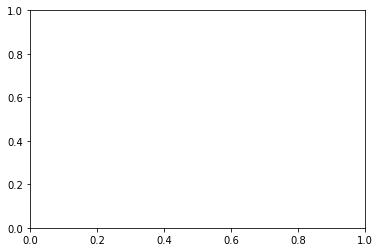

In [93]:
plt.xlim((0,1))
plt.ylim((0,1))

Plot of two pedestrian's Trajectory in same graph:

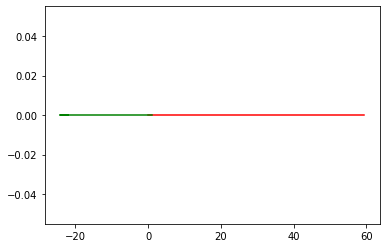

In [94]:
plt.plot(x11, y11, color='r', label='ped-1')
plt.plot(x22, y22, color='g', label='ped-2')

Pedestrian 1: 

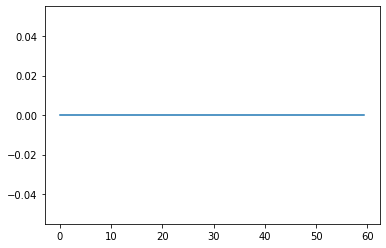

In [95]:
plt.plot(x11,y11)

Pedestrian 2:

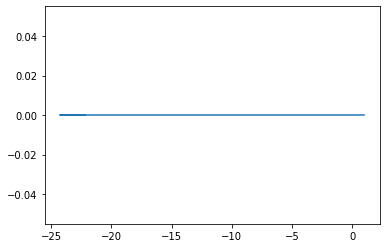

In [96]:
plt.plot(x22,y22)